In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 기본 데이터 확인

In [2]:
df_2022 = pd.read_csv("./data/tmdb_2022.csv")
df_2022.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,My Massive Cock,2022-10-24,movie,47.0,NaN,NaN,Documentary,Mike Nicholls,"Matt Barr, Julia Davis",GB,en,"Channel 4 Television, Out of the Blue Productions",An extra-large penis is an object of desire fo...,"sexual problems, physical challenge, adult",5.800,8
1,365 Days: This Day,2022-04-26,movie,111.0,NaN,NaN,"Romance, Drama","Barbara Białowąs, Tomasz Mandes","Anna-Maria Sieklucka, Michele Morrone, Simone ...",PL,pl,"Ekipa, Open Mind Production",Laura and Massimo are back and hotter than eve...,"gangster, sequel, bdsm, rich man poor woman, s...",5.903,1726
2,Top Gun: Maverick,2022-05-21,movie,131.0,NaN,NaN,"Action, Drama",Joseph Kosinski,"Tom Cruise, Val Kilmer, Miles Teller, Jennifer...",US,en,"Skydance Media, Don Simpson/Jerry Bruckheimer ...",After more than thirty years of service as one...,"fighter pilot, u.s. navy, sequel, nuclear weap...",8.175,9921
3,Puss in Boots: The Last Wish,2022-12-07,movie,103.0,NaN,NaN,"Animation, Adventure, Fantasy, Comedy, Family",Joel Crawford,"Antonio Banderas, Salma Hayek Pinault, Harvey ...",US,en,DreamWorks Animation,Puss in Boots discovers that his passion for a...,"fairy tale, sequel, talking dog, spin off, aft...",8.216,8242
4,Avatar: The Way of Water,2022-12-14,movie,192.0,NaN,NaN,"Science Fiction, Adventure, Action",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",US,en,"20th Century Studios, Lightstorm Entertainment",Set more than a decade after the events of the...,"dying and death, loss of loved one, alien life...",7.611,12614


In [4]:
df_2022.sort_values(by='title', ascending=True).head(10)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
11335,"""Better Late Than Never"" with Tae Kimura",2022-03-24,tv,NaN,1.0,2.0,Talk,NaN,"Tae Kimura, Tetsuhiro Ikeda, Eri Tokunaga, Mak...",JP,ja,NHK,The show is centered around a fictional 'relea...,NaN,0.0,0
8809,"""I Fell in Love With the World""",2022-11-19,movie,15.0,NaN,NaN,NaN,Theodore Schaefer,"David Shakopi, Keaton Tetlow, Emma Duncan, Kel...",US,en,Dweck Productions,A series of surreal vignettes at an American D...,NaN,4.0,2
9248,"""I Missed You""",2022-01-20,movie,21.0,NaN,NaN,Documentary,Trevor Dare,"Val Bauer, Tolya Titaev, Cambryan Sedlick, Pat...",RU,en,NaN,Rassvet presents I MISSED YOU Featuring Val B...,NaN,6.0,1
3672,"""Please Describe Yourself in One Word"": I'm Ba...",2022-01-11,movie,5.0,NaN,NaN,"Animation, Drama",Koichi Chigira,"Hiro Shimono, Akari Kito",JP,ja,SUNRISE,"The anime depicts the ""smart city"" envisioned ...",anime,6.0,1
2359,"""Renjou"" Keishichou Kyoukouhan-gakari Higuchi ...",2022-02-07,movie,95.0,NaN,NaN,"Crime, Drama, Family",Yoshihisa Kodama,"Airi Matsui, Moemi Katayama, Gaku Sano, Satoru...",JP,ja,"TV Tokyo, BS TV Tokyo, UNION TV & MOTION PICTU...","Kosuge, the president of a factory, is killed ...","police, police headquarter, tokyo, japan",7.5,2
1188,"""Sr.""",2022-09-02,movie,90.0,NaN,NaN,Documentary,Chris Smith,"Robert Downey Sr., Robert Downey Jr., Chris Sm...",US,en,"Library Films, Team Downey",A portrait of the life and career of Robert Do...,"biography, reflective, father son relationship",6.9,58
15703,"""Work in Progress""",2022-12-30,tv,30.0,1.0,9.0,"Reality, Documentary",Diogo Rola,NaN,PT,pt,NaN,NaN,NaN,0.0,0
3553,#69 Samskar Colony,2022-03-18,movie,116.0,NaN,NaN,Romance,Sunil Kumar Reddy,"Ester Noronha, Rishwi Thimmaraju, Ajay, Silpa ...",IN,te,NaN,"Koushik, a teenage boy, moves to the city with...",NaN,3.5,2
1679,#Aftermetoo,2022-09-29,movie,84.0,NaN,NaN,Documentary,"Park So-hyun, Lee Som-yi, Kangyu Ga-ram, Soram",NaN,US,ko,gram FILMS,Three years since Korean society was first roc...,metoo,8.0,2
13638,#BFF,2022-05-20,tv,NaN,1.0,5.0,NaN,Bhargav Macherla,"Sirisha Hanumanth, Ramya Pasupuleti, I Dream A...",US,en,Aha,#BFF Is A Coming-Of-Age Story Of Two Young Wom...,NaN,2.0,1


In [5]:
df_2022.isnull().sum()

title                     0
release_date              0
type                      0
runtime                6328
season_count          10000
episode_count         10000
genre                  2862
director               7682
cast                   3801
country                  27
language                  0
production_company     7564
synopsis               4463
tags                  15761
imdb_rating               0
imdb_review_count         0
dtype: int64

# 2. 전처리 전처리_type

In [6]:
df_2022[df_2022['season_count'].isna() & df_2022['episode_count'].isna()].head(5)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,My Massive Cock,2022-10-24,movie,47.0,NaN,NaN,Documentary,Mike Nicholls,"Matt Barr, Julia Davis",GB,en,"Channel 4 Television, Out of the Blue Productions",An extra-large penis is an object of desire fo...,"sexual problems, physical challenge, adult",5.800,8
1,365 Days: This Day,2022-04-26,movie,111.0,NaN,NaN,"Romance, Drama","Barbara Białowąs, Tomasz Mandes","Anna-Maria Sieklucka, Michele Morrone, Simone ...",PL,pl,"Ekipa, Open Mind Production",Laura and Massimo are back and hotter than eve...,"gangster, sequel, bdsm, rich man poor woman, s...",5.903,1726
2,Top Gun: Maverick,2022-05-21,movie,131.0,NaN,NaN,"Action, Drama",Joseph Kosinski,"Tom Cruise, Val Kilmer, Miles Teller, Jennifer...",US,en,"Skydance Media, Don Simpson/Jerry Bruckheimer ...",After more than thirty years of service as one...,"fighter pilot, u.s. navy, sequel, nuclear weap...",8.175,9921
3,Puss in Boots: The Last Wish,2022-12-07,movie,103.0,NaN,NaN,"Animation, Adventure, Fantasy, Comedy, Family",Joel Crawford,"Antonio Banderas, Salma Hayek Pinault, Harvey ...",US,en,DreamWorks Animation,Puss in Boots discovers that his passion for a...,"fairy tale, sequel, talking dog, spin off, aft...",8.216,8242
4,Avatar: The Way of Water,2022-12-14,movie,192.0,NaN,NaN,"Science Fiction, Adventure, Action",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",US,en,"20th Century Studios, Lightstorm Entertainment",Set more than a decade after the events of the...,"dying and death, loss of loved one, alien life...",7.611,12614


In [7]:
df_2022[df_2022['season_count'].isna() & df_2022['episode_count'].isna()].shape

(10000, 16)

In [8]:
df_2022['type'].value_counts(dropna=False)

type
movie    10000
tv       10000
Name: count, dtype: int64

In [9]:
print(df_2022[df_2022['type'] == 'movie']['season_count'].value_counts(dropna=False))
print(df_2022[df_2022['type'] == 'movie']['episode_count'].value_counts(dropna=False))

season_count
NaN    10000
Name: count, dtype: int64
episode_count
NaN    10000
Name: count, dtype: int64


In [10]:
print(df_2022[df_2022['type'] == 'tv']['season_count'].value_counts(dropna=False))

season_count
1.0     8102
2.0     1148
3.0      470
4.0      177
5.0       39
6.0       25
7.0        8
8.0        6
9.0        5
12.0       4
10.0       4
13.0       3
15.0       2
11.0       1
14.0       1
31.0       1
26.0       1
21.0       1
32.0       1
41.0       1
Name: count, dtype: int64


In [11]:
print(df_2022[df_2022['type'] == 'tv']['episode_count'].value_counts(dropna=False))

episode_count
1.0      1302
6.0       960
8.0       848
4.0       656
10.0      608
         ... 
294.0       1
425.0       1
215.0       1
179.0       1
0.0         1
Name: count, Length: 225, dtype: int64


In [12]:
df_2022_1 = df_2022

In [13]:
# movie인 경우 season/episode count가 NaN이면 1로 채움
df_2022_1.loc[df_2022_1['type'] == 'movie', ['season_count', 'episode_count']] = df_2022_1.loc[df_2022_1['type'] == 'movie', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2022_1.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,My Massive Cock,2022-10-24,movie,47.0,1.0,1.0,Documentary,Mike Nicholls,"Matt Barr, Julia Davis",GB,en,"Channel 4 Television, Out of the Blue Productions",An extra-large penis is an object of desire fo...,"sexual problems, physical challenge, adult",5.800,8
1,365 Days: This Day,2022-04-26,movie,111.0,1.0,1.0,"Romance, Drama","Barbara Białowąs, Tomasz Mandes","Anna-Maria Sieklucka, Michele Morrone, Simone ...",PL,pl,"Ekipa, Open Mind Production",Laura and Massimo are back and hotter than eve...,"gangster, sequel, bdsm, rich man poor woman, s...",5.903,1726
2,Top Gun: Maverick,2022-05-21,movie,131.0,1.0,1.0,"Action, Drama",Joseph Kosinski,"Tom Cruise, Val Kilmer, Miles Teller, Jennifer...",US,en,"Skydance Media, Don Simpson/Jerry Bruckheimer ...",After more than thirty years of service as one...,"fighter pilot, u.s. navy, sequel, nuclear weap...",8.175,9921
3,Puss in Boots: The Last Wish,2022-12-07,movie,103.0,1.0,1.0,"Animation, Adventure, Fantasy, Comedy, Family",Joel Crawford,"Antonio Banderas, Salma Hayek Pinault, Harvey ...",US,en,DreamWorks Animation,Puss in Boots discovers that his passion for a...,"fairy tale, sequel, talking dog, spin off, aft...",8.216,8242
4,Avatar: The Way of Water,2022-12-14,movie,192.0,1.0,1.0,"Science Fiction, Adventure, Action",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",US,en,"20th Century Studios, Lightstorm Entertainment",Set more than a decade after the events of the...,"dying and death, loss of loved one, alien life...",7.611,12614


In [15]:
df_2022[(df_2022['type'] == 'tv') & (df_2022['season_count'].isna() | df_2022['episode_count'].isna())]
#df_2020[(df_2020['type'] == 'movie') & (df_2020['season_count'].isna() | df_2020['episode_count'].isna())]

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count


In [16]:
print(df_2022_1[df_2022_1['season_count'] == 1.0]['episode_count'].value_counts(dropna=False))

episode_count
1.0      11252
6.0        926
8.0        801
4.0        641
10.0       558
         ...  
104.0        1
178.0        1
504.0        1
101.0        1
0.0          1
Name: count, Length: 163, dtype: int64


In [17]:
print(df_2022_1[df_2022_1['episode_count'] == 1.0]['season_count'].value_counts(dropna=False))

season_count
1.0     11252
2.0        29
3.0        11
4.0         4
9.0         1
15.0        1
21.0        1
6.0         1
12.0        1
41.0        1
Name: count, dtype: int64


In [19]:
df_2022_2 = df_2022_1
df_2022_2.loc[df_2022_2['type'] == 'tv', ['season_count', 'episode_count']] = df_2022_2.loc[df_2022_1['type'] == 'tv', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2022_2.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,My Massive Cock,2022-10-24,movie,47.0,1.0,1.0,Documentary,Mike Nicholls,"Matt Barr, Julia Davis",GB,en,"Channel 4 Television, Out of the Blue Productions",An extra-large penis is an object of desire fo...,"sexual problems, physical challenge, adult",5.800,8
1,365 Days: This Day,2022-04-26,movie,111.0,1.0,1.0,"Romance, Drama","Barbara Białowąs, Tomasz Mandes","Anna-Maria Sieklucka, Michele Morrone, Simone ...",PL,pl,"Ekipa, Open Mind Production",Laura and Massimo are back and hotter than eve...,"gangster, sequel, bdsm, rich man poor woman, s...",5.903,1726
2,Top Gun: Maverick,2022-05-21,movie,131.0,1.0,1.0,"Action, Drama",Joseph Kosinski,"Tom Cruise, Val Kilmer, Miles Teller, Jennifer...",US,en,"Skydance Media, Don Simpson/Jerry Bruckheimer ...",After more than thirty years of service as one...,"fighter pilot, u.s. navy, sequel, nuclear weap...",8.175,9921
3,Puss in Boots: The Last Wish,2022-12-07,movie,103.0,1.0,1.0,"Animation, Adventure, Fantasy, Comedy, Family",Joel Crawford,"Antonio Banderas, Salma Hayek Pinault, Harvey ...",US,en,DreamWorks Animation,Puss in Boots discovers that his passion for a...,"fairy tale, sequel, talking dog, spin off, aft...",8.216,8242
4,Avatar: The Way of Water,2022-12-14,movie,192.0,1.0,1.0,"Science Fiction, Adventure, Action",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",US,en,"20th Century Studios, Lightstorm Entertainment",Set more than a decade after the events of the...,"dying and death, loss of loved one, alien life...",7.611,12614


# 2. 데이터 전처리_runtime

In [20]:
df_2022_2.isnull().sum()

title                     0
release_date              0
type                      0
runtime                6328
season_count              0
episode_count             0
genre                  2862
director               7682
cast                   3801
country                  27
language                  0
production_company     7564
synopsis               4463
tags                  15761
imdb_rating               0
imdb_review_count         0
dtype: int64

In [21]:
df_2022_2.shape

(20000, 16)

In [22]:
df_2022_2[df_2022_2['runtime'].isna() & df_2022_2['genre'].isna() ].shape

(2051, 16)

## 2_2 runtime null 값 열 제거

In [24]:
df_2022_3 = df_2022_2

In [25]:
df_2022_3.dropna(subset=['runtime'], inplace=True)

In [26]:
df_2022_3.shape

(13672, 16)

# 2. 데이터 전처리_pr

In [27]:
df_2022_4 = df_2022_3
df_2022_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,My Massive Cock,2022-10-24,movie,47.0,1.0,1.0,Documentary,Mike Nicholls,"Matt Barr, Julia Davis",GB,en,"Channel 4 Television, Out of the Blue Productions",An extra-large penis is an object of desire fo...,"sexual problems, physical challenge, adult",5.800,8
1,365 Days: This Day,2022-04-26,movie,111.0,1.0,1.0,"Romance, Drama","Barbara Białowąs, Tomasz Mandes","Anna-Maria Sieklucka, Michele Morrone, Simone ...",PL,pl,"Ekipa, Open Mind Production",Laura and Massimo are back and hotter than eve...,"gangster, sequel, bdsm, rich man poor woman, s...",5.903,1726
2,Top Gun: Maverick,2022-05-21,movie,131.0,1.0,1.0,"Action, Drama",Joseph Kosinski,"Tom Cruise, Val Kilmer, Miles Teller, Jennifer...",US,en,"Skydance Media, Don Simpson/Jerry Bruckheimer ...",After more than thirty years of service as one...,"fighter pilot, u.s. navy, sequel, nuclear weap...",8.175,9921
3,Puss in Boots: The Last Wish,2022-12-07,movie,103.0,1.0,1.0,"Animation, Adventure, Fantasy, Comedy, Family",Joel Crawford,"Antonio Banderas, Salma Hayek Pinault, Harvey ...",US,en,DreamWorks Animation,Puss in Boots discovers that his passion for a...,"fairy tale, sequel, talking dog, spin off, aft...",8.216,8242
4,Avatar: The Way of Water,2022-12-14,movie,192.0,1.0,1.0,"Science Fiction, Adventure, Action",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",US,en,"20th Century Studios, Lightstorm Entertainment",Set more than a decade after the events of the...,"dying and death, loss of loved one, alien life...",7.611,12614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19933,雨林之子,2022-04-19,tv,90.0,1.0,1.0,Documentary,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0
19945,პრაიმ ჰაუსი,2022-05-03,tv,55.0,1.0,1.0,"Reality, Talk",NaN,NaN,GE,ka,Rustavi 2,NaN,NaN,0.000,0
19952,Our Relationship Ended Before It Began,2022-03-02,tv,8.0,1.0,2.0,Drama,NaN,"Park Ha Young, Park San Ha",KR,ko,NaN,Kim Ah Young recently started working at Yoon ...,NaN,0.000,0
19990,奈何倾心,2022-01-01,tv,8.0,1.0,1.0,Animation,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0


In [28]:
df_2022_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13672 entries, 0 to 19993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13672 non-null  object 
 1   release_date        13672 non-null  object 
 2   type                13672 non-null  object 
 3   runtime             13672 non-null  float64
 4   season_count        13672 non-null  float64
 5   episode_count       13672 non-null  float64
 6   genre               12861 non-null  object 
 7   director            10468 non-null  object 
 8   cast                12420 non-null  object 
 9   country             13665 non-null  object 
 10  language            13672 non-null  object 
 11  production_company  9734 non-null   object 
 12  synopsis            12131 non-null  object 
 13  tags                3960 non-null   object 
 14  imdb_rating         13672 non-null  float64
 15  imdb_review_count   13672 non-null  int64  
dtypes: float6

### tags 관련 기본 문제 해결

1) synopsis, tags, genre가 모두 NaN인 데이터 모두 제거

In [29]:
# 1. 세기: synopsis, genre가 모두 NaN인 행 개수
nan_rows = df_2022_4[['synopsis', 'genre']].isna().all(axis=1)
count_nan_rows = nan_rows.sum()
print(f"synopsis, genre가 모두 NaN인 행 개수: {count_nan_rows}")

synopsis, genre가 모두 NaN인 행 개수: 269


In [30]:
# 2. 삭제: 그런 행 삭제
df_2022_4_cleaned = df_2022_4.loc[~nan_rows].copy()

In [30]:
df_2022_4 = df_2022_4.loc[~nan_rows].copy()
df_2022_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13403 entries, 0 to 19993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13403 non-null  object 
 1   release_date        13403 non-null  object 
 2   type                13403 non-null  object 
 3   runtime             13403 non-null  float64
 4   season_count        13403 non-null  float64
 5   episode_count       13403 non-null  float64
 6   genre               12861 non-null  object 
 7   director            10322 non-null  object 
 8   cast                12205 non-null  object 
 9   country             13396 non-null  object 
 10  language            13403 non-null  object 
 11  production_company  9649 non-null   object 
 12  synopsis            12131 non-null  object 
 13  tags                3957 non-null   object 
 14  imdb_rating         13403 non-null  float64
 15  imdb_review_count   13403 non-null  int64  
dtypes: float6

In [32]:
df_2022_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,My Massive Cock,2022-10-24,movie,47.0,1.0,1.0,Documentary,Mike Nicholls,"Matt Barr, Julia Davis",GB,en,"Channel 4 Television, Out of the Blue Productions",An extra-large penis is an object of desire fo...,"sexual problems, physical challenge, adult",5.800,8
1,365 Days: This Day,2022-04-26,movie,111.0,1.0,1.0,"Romance, Drama","Barbara Białowąs, Tomasz Mandes","Anna-Maria Sieklucka, Michele Morrone, Simone ...",PL,pl,"Ekipa, Open Mind Production",Laura and Massimo are back and hotter than eve...,"gangster, sequel, bdsm, rich man poor woman, s...",5.903,1726
2,Top Gun: Maverick,2022-05-21,movie,131.0,1.0,1.0,"Action, Drama",Joseph Kosinski,"Tom Cruise, Val Kilmer, Miles Teller, Jennifer...",US,en,"Skydance Media, Don Simpson/Jerry Bruckheimer ...",After more than thirty years of service as one...,"fighter pilot, u.s. navy, sequel, nuclear weap...",8.175,9921
3,Puss in Boots: The Last Wish,2022-12-07,movie,103.0,1.0,1.0,"Animation, Adventure, Fantasy, Comedy, Family",Joel Crawford,"Antonio Banderas, Salma Hayek Pinault, Harvey ...",US,en,DreamWorks Animation,Puss in Boots discovers that his passion for a...,"fairy tale, sequel, talking dog, spin off, aft...",8.216,8242
4,Avatar: The Way of Water,2022-12-14,movie,192.0,1.0,1.0,"Science Fiction, Adventure, Action",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",US,en,"20th Century Studios, Lightstorm Entertainment",Set more than a decade after the events of the...,"dying and death, loss of loved one, alien life...",7.611,12614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19933,雨林之子,2022-04-19,tv,90.0,1.0,1.0,Documentary,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0
19945,პრაიმ ჰაუსი,2022-05-03,tv,55.0,1.0,1.0,"Reality, Talk",NaN,NaN,GE,ka,Rustavi 2,NaN,NaN,0.000,0
19952,Our Relationship Ended Before It Began,2022-03-02,tv,8.0,1.0,2.0,Drama,NaN,"Park Ha Young, Park San Ha",KR,ko,NaN,Kim Ah Young recently started working at Yoon ...,NaN,0.000,0
19990,奈何倾心,2022-01-01,tv,8.0,1.0,1.0,Animation,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0


## director와 cast가 모두 nan인 행 제거

In [33]:
nan_both = df_2022_4[(df_2022_4['director'].isna()) & (df_2022_4['cast'].isna())]
print(f"director와 cast 둘 다 NaN인 행 개수: {len(nan_both)}")

director와 cast 둘 다 NaN인 행 개수: 689


In [34]:
df_2022_4 = df_2022_4.dropna(subset=['director', 'cast'], how='all')

In [35]:
df_2022_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12714 entries, 0 to 19993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               12714 non-null  object 
 1   release_date        12714 non-null  object 
 2   type                12714 non-null  object 
 3   runtime             12714 non-null  float64
 4   season_count        12714 non-null  float64
 5   episode_count       12714 non-null  float64
 6   genre               12221 non-null  object 
 7   director            10322 non-null  object 
 8   cast                12205 non-null  object 
 9   country             12708 non-null  object 
 10  language            12714 non-null  object 
 11  production_company  9295 non-null   object 
 12  synopsis            11716 non-null  object 
 13  tags                3948 non-null   object 
 14  imdb_rating         12714 non-null  float64
 15  imdb_review_count   12714 non-null  int64  
dtypes: float6

# tag npl처리

In [37]:
# 1. tags 결측치는 빈 문자열로 대체
df_2022_4['tags'] = df_2022_4['tags'].fillna('')

# 2. synopsis, genre 결측치 처리 후 text_input 생성
df_2022_4['synopsis'] = df_2022_4['synopsis'].fillna('')
df_2022_4['genre'] = df_2022_4['genre'].fillna('')
df_2022_4['text_input'] = df_2022_4['synopsis'] + ' ' + df_2022_4['genre']

# 3. tags 기준으로 train / test 나누기
train_df = df_2022_4[df_2022_4['tags'] != ''].copy()
test_df = df_2022_4[df_2022_4['tags'] == ''].copy()

# 4. tags 리스트로 분리
train_df['tags_list'] = train_df['tags'].apply(lambda x: x.split(','))

# 5. 다중 라벨 인코딩
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['tags_list'])

# 6. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text_input'])

# 7. 모델 학습 (LogisticRegression 다중 라벨)
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# 8. 예측 대상(test_df)이 비어있지 않으면 예측 수행
if not test_df.empty:
    X_test = vectorizer.transform(test_df['text_input'])
    y_prob = model.predict_proba(X_test)

    # 예측 임계값 설정 (낮춰서 태그 생성 늘림)
    threshold = 0.07
    y_pred = (y_prob >= threshold).astype(int)

    predicted_tags = mlb.inverse_transform(y_pred)
    test_df['predicted_tags'] = [', '.join(tags) if tags else np.nan for tags in predicted_tags]

    # 9. 규칙 기반 태그 보완용 키워드 룰 정의
    rules = {
        'romance': ['romance', 'love', 'relationship', 'affair', 'heart', 'kiss', 'wedding',
                    'boyfriend', 'girlfriend', 'breakup', 'dating', 'first love',
                    'valentine', 'romantic', 'jealousy', 'intimacy', 'honeymoon'],
        'action': ['battle', 'war', 'fight', 'soldier', 'gun', 'explosion', 'chase', 'enemy',
                'car chase', 'explosives', 'gunfight', 'hand-to-hand', 'sniper',
                'ambush', 'mercenary', 'adrenaline', 'combat', 'high-octane'],
        'thriller': ['thriller', 'mystery', 'suspense', 'crime', 'killer', 'murder', 'detective',
                    'interrogation', 'conspiracy', 'mind game', 'tension', 'abduction',
                    'dangerous', 'mind-bending', 'ticking clock', 'trap'],
        'comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke', 'parody',
                'sitcom', 'sarcasm', 'one-liner', 'slapstick', 'banter',
                'awkward moment', 'gag', 'prank', 'hilarity'],
        'horror': ['ghost', 'horror', 'zombie', 'demon', 'vampire', 'curse',
                'haunted', 'scream', 'paranormal', 'supernatural', 'bloodcurdling',
                'creepy', 'terrifying', 'evil spirit', 'possessed', 'ritual'],
        'fantasy': ['magic', 'wizard', 'dragon', 'kingdom', 'mythical',
                    'sorcerer', 'enchanted', 'portal', 'spell', 'epic quest',
                    'mystical creature', 'ancient prophecy', 'grimoire'],
        'sci-fi': ['space', 'alien', 'robot', 'future', 'technology', 'sci-fi', 'cyber',
                'cyborg', 'AI uprising', 'time machine', 'spaceship', 'hyperspace',
                'galaxy', 'terraforming', 'futuristic', 'parallel universe', 'bioengineering'],
        'drama': ['family', 'life', 'struggle', 'emotional', 'drama', 'society',
                'inner struggle', 'self-discovery', 'character driven', 'emotional arc',
                'breakdown', 'life lesson', 'interpersonal', 'catharsis'],
        'crime': ['criminal', 'robbery', 'heist', 'mafia', 'gang',
                'heist', 'detective', 'undercover', 'criminal syndicate',
                'drug cartel', 'interrogation room', 'forensics', 'manhunt'],
        'animation': ['animation', 'cartoon', 'drawn', 'animated'],
        'sports': ['sports', 'football', 'basketball', 'coach', 'tournament'],
        'historical': ['king', 'queen', 'dynasty', 'empire', 'history', 'ancient'],
        'adventure': ['journey', 'quest', 'treasure', 'explore', 'island', 'survival'],
        'musical': ['song', 'singing', 'performance', 'dance', 'stage', 'music'],
        'documentary': ['real', 'true story', 'interview', 'archive', 'biography', 'footage'],
        'psychological': ['mind', 'mental', 'insanity', 'delusion', 'subconscious', 'dream'],
        'superhero': ['hero', 'superpower', 'villain', 'save', 'city', 'mask'],
        'noir': ['detective', 'dark', 'cigarette', 'femme fatale', 'shadow', 'monologue'],
        'family': ['parent', 'child', 'home', 'holiday', 'siblings', 'bond'],
        'rom-com': ['love', 'funny', 'awkward', 'date', 'charm', 'happy ending'],
        'military': ['army', 'navy', 'mission', 'rank', 'base', 'operation'],
        'cyberpunk': ['neon', 'hacker', 'corporation', 'dystopia', 'implant', 'surveillance'],
        'post-apocalyptic': ['ruins', 'survivor', 'radiation', 'collapse', 'tribe', 'scavenge'],
        'teen': ['high school', 'prom', 'friendship', 'coming of age', 'crush', 'rebellion'],
        'feel-good': ['inspiring', 'heartwarming', 'uplifting', 'positive', 'hope', 'smile'],
        'dark': ['depressing', 'grim', 'tragic', 'bleak', 'morbid'],
        'female-lead': ['strong woman', 'heroine', 'female protagonist', 'girl power'],
        'twist': ['plot twist', 'unpredictable', 'reveal', 'surprise ending'],
        'based-on-true-story': ['true story', 'biopic', 'real events', 'true events'],
        'underdog': ['struggle', 'rise', 'overcome', 'unlikely hero', 'against all odds'],
        'ensemble': ['many characters', 'multiple leads', 'group dynamic', 'interwoven stories'],
        'nostalgic': ['retro', 'classic', 'throwback', '80s', '90s', 'childhood'],
        'social-issue': ['racism', 'inequality', 'poverty', 'justice', 'activism'],
        'trending-theme': ['AI', 'climate', 'pandemic', 'influencer', 'metaverse'],
        'revenge': ['revenge', 'vengeance', 'payback', 'retaliation', 'score to settle'],
        'detective': ['detective', 'investigation', 'clues', 'case', 'inspector', 'sleuth'],
        'time-travel': ['time travel', 'time loop', 'past and future', 'timeline', 'chronosphere'],
        'courtroom': ['courtroom', 'trial', 'lawyer', 'judge', 'defendant', 'testimony'],
        'survival': ['survival', 'wilderness', 'isolation', 'extreme conditions', 'barely escape'],
        'espionage': ['spy', 'espionage', 'agent', 'undercover', 'intel', 'classified'],
        'campus': ['college', 'campus', 'lecture hall', 'seniors', 'dorm', 'professor'],
        'startup': ['startup', 'entrepreneur', 'founder', 'venture', 'pitching', 'angel investor'],
        'heist': ['heist', 'robbery', 'master plan', 'getaway', 'vault', 'crew'],
        'royalty': ['prince', 'princess', 'royal', 'crown', 'throne', 'palace'],
        'wuxia': ['martial arts', 'swordplay', 'wuxia', 'clan', 'sect', 'inner energy'],
        'idol': ['idol', 'stage', 'fandom', 'trainee', 'debut', 'fan meeting'],
        'political': ['election', 'politics', 'scandal', 'congress', 'corruption', 'regime'],
        'revenge-romance': ['bitter love', 'masked identity', 'burning passion', 'payback with love'],
        'healing-romance': ['gentle romance', 'emotional support', 'quiet relationship', 'warm affection'],
        'coming-of-age': ['self-discovery', 'growing up', 'teenage years', 'puberty',
                        'youth', 'maturity', 'identity', 'high school', 'first time', 'life lessons'],
        'dark-comedy': ['dark humor', 'macabre laugh', 'twisted joke', 'morbidly funny',
                        'ironic death', 'satirical tragedy', 'deadpan', 'black comedy'],
        'dystopian': ['oppressive regime', 'totalitarian', 'no freedom', 'surveillance state',
                    'rebellion', 'social collapse', 'harsh world', 'authoritarian', 'controlled society'],
        'slice-of-life': ['daily routine', 'ordinary moments', 'casual life', 'everyday drama',
                        'subtle emotion', 'mundane beauty', 'life as it is', 'quiet narrative'],
        'found-family': ['bond', 'unrelated family', 'loyal companions', 'chosen family',
                        'support system', 'teamwork', 'squad', 'surrogate parents', 'emotional ties'],
        'road-trip': ['on the road', 'journey across', 'miles', 'car travel', 'hit the road',
                    'cross-country', 'travel companions', 'gas station', 'stopover', 'long drive'],
        'tech-noir': ['grim future', 'tech-savvy criminal', 'neon-lit', 'cyber corruption',
                    'urban decay', 'AI rebellion', 'cyberspace', 'digital heist', 'surveillance overload'],
        'folklore': ['legend', 'traditional tale', 'mythical creature', 'ancient lore',
                    'cultural story', 'spirit', 'oral tradition', 'forest demon', 'village tale']
    }

    def simple_tag_rule(text):
        text = text.lower()
        tags = set()
        for tag, keywords in rules.items():
            if any(word in text for word in keywords):
                tags.add(tag)
        return ', '.join(tags) if tags else np.nan

    # 10. 예측 실패 (nan)인 경우 규칙 기반으로 태그 보완
    no_tag_idx = test_df[test_df['predicted_tags'].isna()].index
    test_df.loc[no_tag_idx, 'predicted_tags'] = test_df.loc[no_tag_idx, 'text_input'].apply(simple_tag_rule)

    # 11. 원본에 태그 삽입
    df_2022_4.loc[test_df.index, 'tags'] = test_df['predicted_tags']

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/4221271656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['tags'] = df_2022_4['tags'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/4221271656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['synopsis'] = df_2022_4['synopsis'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/4221271656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [38]:
df_2022_4['tags'].value_counts(dropna=False)

tags
 short film                                                                                                            548
documentary                                                                                                            273
drama                                                                                                                  224
NaN                                                                                                                    201
christmas                                                                                                              191
                                                                                                                      ... 
secret agent, latin comedy                                                                                               1
espionage, atomic bomb, fbi, world war ii, nuclear bomb, nuclear weapons, soviet spy, manhattan project, los alamos      1
drifting, c

# country에서 nan은 language와 같은 값으로 처리

In [39]:
df_2022_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              2392
cast                   509
country                  6
language                 0
production_company    3419
synopsis                 0
tags                   201
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [40]:
df_2022_4['country'].fillna(df_2022_4['language'], inplace=True)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/2522131460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2022_4['country'].fillna(df_2022_4['language'], inplace=True)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/2522131460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['country'].filln

In [41]:
df_2022_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              2392
cast                   509
country                  0
language                 0
production_company    3419
synopsis                 0
tags                   201
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [42]:
df_2022_4['production_company'].value_counts(dropna=False)

production_company
NaN                                             3419
Viva Films, Vivamax                               38
NHK                                               34
TVB                                               31
Youku                                             22
                                                ... 
Srab Films, Possibles Média, France 2 Cinéma       1
Saregama India, Yoodlee Films                      1
Ravenser Odd, Biennale College Cinema              1
Jio Studios                                        1
Urban Brew Studios                                 1
Name: count, Length: 7412, dtype: int64

# production_company, director, cast _is_comming 처리
- 결측 값이 많아 이렇게 진행
- 정보 부족이지 하나의 회사명, 이름은 x
- 'unknown'만 삽입했을 경우 정상 값이라고 학습하는 것을 방지 => unknown으로 채우되 값은 없음으로 지정하기 위해 사용

In [43]:
unique_count = df_2022_4['production_company'].nunique(dropna=True)
print(unique_count)

7411


In [44]:
df_2022_4['production_company_is_missing'] = df_2022_4['production_company'].isna().astype(int)
df_2022_4['production_company'] = df_2022_4['production_company'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/3673464115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['production_company_is_missing'] = df_2022_4['production_company'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/3673464115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['production_company'] = df_2022_4['production_company'].fillna('unknown')


In [45]:
df_2022_4['cast_is_missing'] = df_2022_4['cast'].isna().astype(int)
df_2022_4['cast'] = df_2022_4['cast'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/3136803321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['cast_is_missing'] = df_2022_4['cast'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/3136803321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['cast'] = df_2022_4['cast'].fillna('unknown')


In [46]:
df_2022_4['director_is_missing'] = df_2022_4['director'].isna().astype(int)
df_2022_4['director'] = df_2022_4['director'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/3044157545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['director_is_missing'] = df_2022_4['director'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/3044157545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_4['director'] = df_2022_4['director'].fillna('unknown')


In [47]:
print(df_2022_4.shape)
print(df_2022_4.isnull().sum())

(12714, 20)
title                              0
release_date                       0
type                               0
runtime                            0
season_count                       0
episode_count                      0
genre                              0
director                           0
cast                               0
country                            0
language                           0
production_company                 0
synopsis                           0
tags                             201
imdb_rating                        0
imdb_review_count                  0
text_input                         0
production_company_is_missing      0
cast_is_missing                    0
director_is_missing                0
dtype: int64


In [48]:
nan_tags_rows = df_2022_4[df_2022_4['tags'].isna()]
nan_tags_rows

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count,text_input,production_company_is_missing,cast_is_missing,director_is_missing
531,Avatar: The Deep Dive - A Special Edition of 2...,2022-12-13,movie,38.0,1.0,1.0,Documentary,Dave Hoffman,"Chris Connelly, James Cameron, Zoe Saldaña, Si...",US,en,"ABC News, ABC News Studios",An inside look at one of the most anticipated ...,NaN,7.1,81,An inside look at one of the most anticipated ...,0,0,0
716,Galaxy Games,2022-07-04,movie,83.0,1.0,1.0,Fantasy,Ben Carland,"Jake Brown, Jake White, Spenser Pollard, Caleb...",US,en,High Octane Pictures,A group of young adults are sent to a faraway ...,NaN,5.1,10,A group of young adults are sent to a faraway ...,0,0,0
722,Galaxy Games,2022-07-04,movie,83.0,1.0,1.0,Fantasy,Ben Carland,"Jake Brown, Jake White, Spenser Pollard, Caleb...",US,en,High Octane Pictures,A group of young adults are sent to a faraway ...,NaN,5.1,10,A group of young adults are sent to a faraway ...,0,0,0
2095,Orange,2022-01-31,movie,20.0,1.0,1.0,,Jie Hao,"Sun Yihan, Wang Qiang",CN,en,unknown,"A courier, a disabled lady, and her cat",NaN,0.0,0,"A courier, a disabled lady, and her cat",1,0,0
2688,Siam,2022-05-24,movie,69.0,1.0,1.0,,Chen Hua,"Li Jiuxiao, You Jingru",CN,zh,unknown,The film is adapted from the popular manga of ...,NaN,0.0,0,The film is adapted from the popular manga of ...,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Dans le vestiaire,2022-11-20,tv,40.0,4.0,19.0,Talk,unknown,"Vincenzo Ciuro, Anne Ruwet",BE,fr,"RTL Belgium, RTL Sports",,NaN,0.0,0,Talk,0,0,1
18452,The Paths of Jesus,2022-12-09,tv,43.0,1.0,6.0,Documentary,unknown,Rodrigo Alvarez,BR,pt,Boutique Filmes,This series is part of the latest interpretati...,NaN,0.0,0,This series is part of the latest interpretati...,0,0,1
18563,في ضيافة الاء,2022-04-02,tv,39.0,1.0,1.0,Talk,unknown,Alaa Hussein,IQ,ar,unknown,,NaN,0.0,0,Talk,1,0,1
19350,PinkOver Recipes,2022-01-25,tv,1.0,2.0,4.0,News,unknown,"Sasha Lima, Ana Jéssica","BR, US",pt,Canva PinkOver US,,NaN,10.0,1,News,0,0,1


In [49]:
df_2022_5 = df_2022_4[df_2020_4['tags'].notna()].copy()
df_2022_5.info()

NameError: name 'df_2020_4' is not defined

In [50]:
#df_2020_5.to_csv('전처리_완료(csv)/2020년도 전처리.csv', index=False)

## 데이터 시각화 (큰 그림)

In [50]:
df = pd.read_csv('./data/2022년도 전처리.csv')

## type(영화/tv 비율)

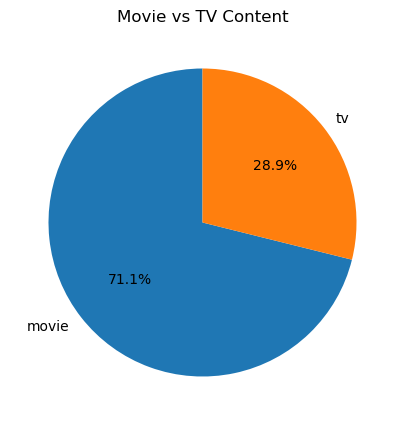

In [51]:
### 1. type (영화/TV 비율)
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,5))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Movie vs TV Content')
plt.ylabel('')
plt.show()

## 개봉연도 분포

In [52]:
### 2. release_date (개봉 연도 분포)
# df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
# plt.figure(figsize=(10,5))
# sns.histplot(df['release_year'].dropna(), bins=20, kde=False)
# plt.title('Distribution of Release Year')
# plt.xlabel('Release Year')
# plt.ylabel('Count')
# plt.show()

## 상영시간 분포

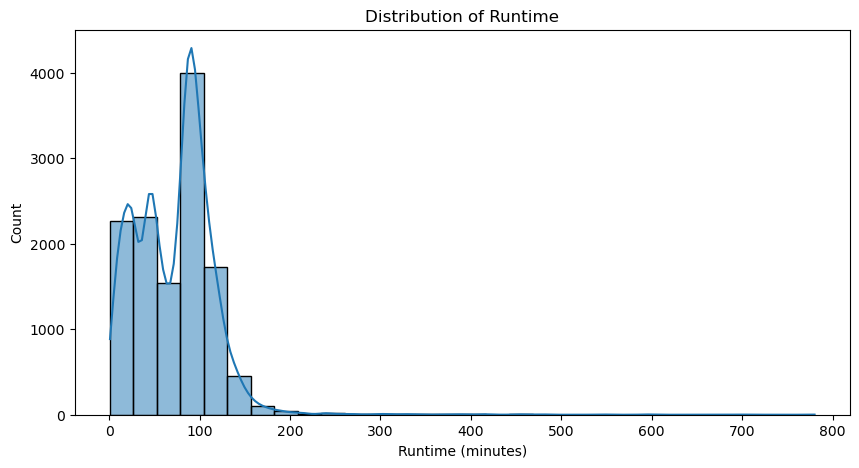

In [53]:
### 3. runtime (상영시간 분포)
plt.figure(figsize=(10,5))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

## 장르분포

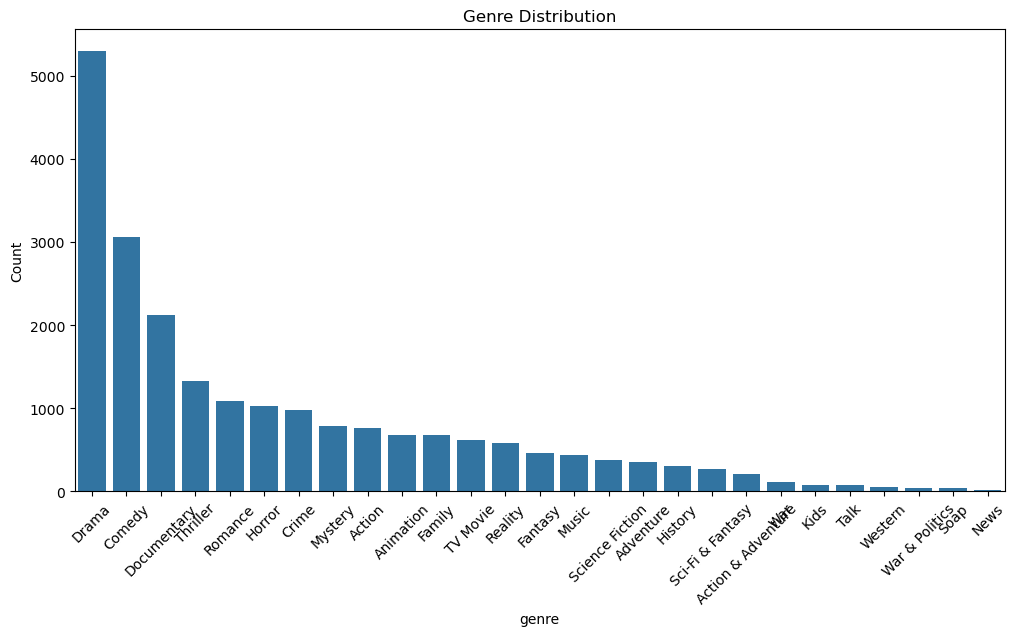

In [54]:
genre_series = df['genre'].dropna().str.split(', ')
genre_list = genre_series.explode()
genre_counts = genre_list.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## country 분포

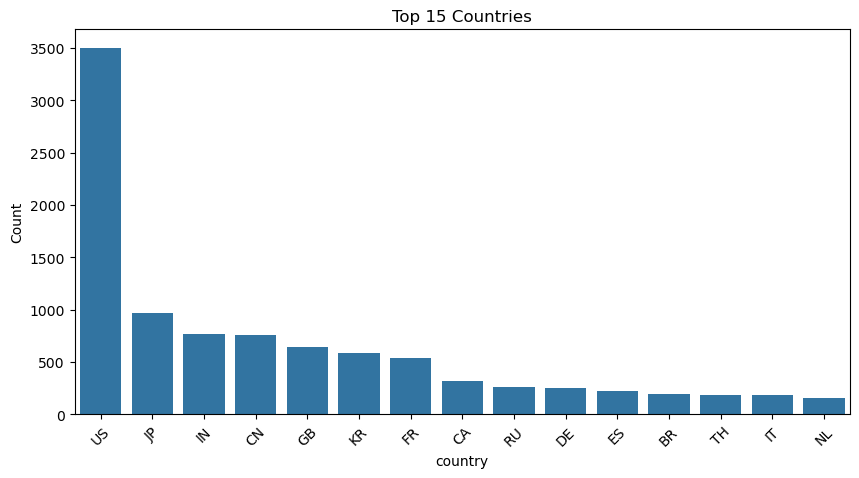

In [55]:
country_counts = df['country'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 15 Countries')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## language 분포

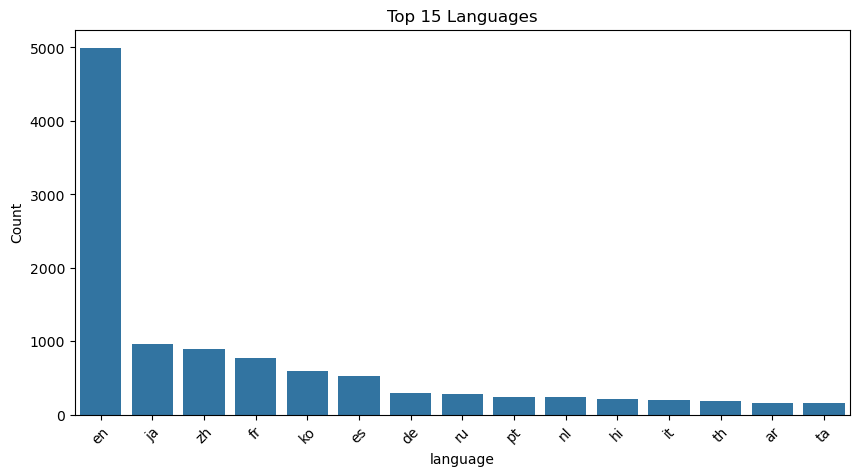

In [56]:
language_counts = df['language'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Top 15 Languages')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## imdb rating 분포

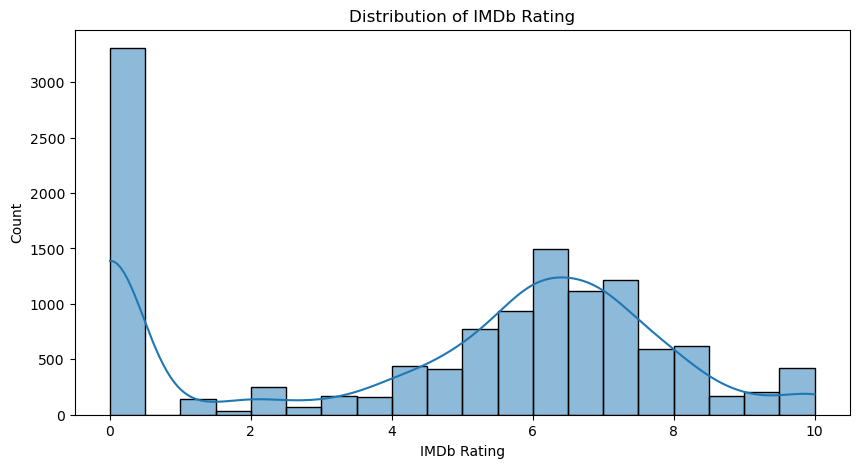

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(df['imdb_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

## imdb_rating vs imdb_review_count

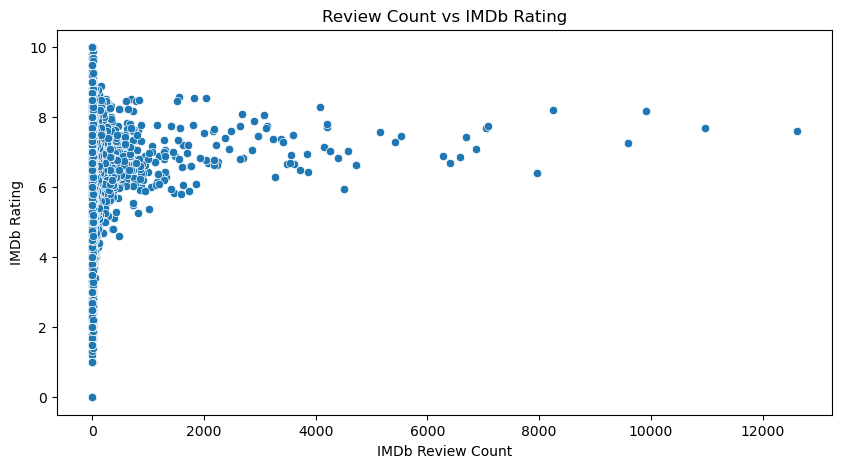

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='imdb_review_count', y='imdb_rating', data=df)
plt.title('Review Count vs IMDb Rating')
plt.xlabel('IMDb Review Count')
plt.ylabel('IMDb Rating')
plt.show()

## runtime vs imdb_rating

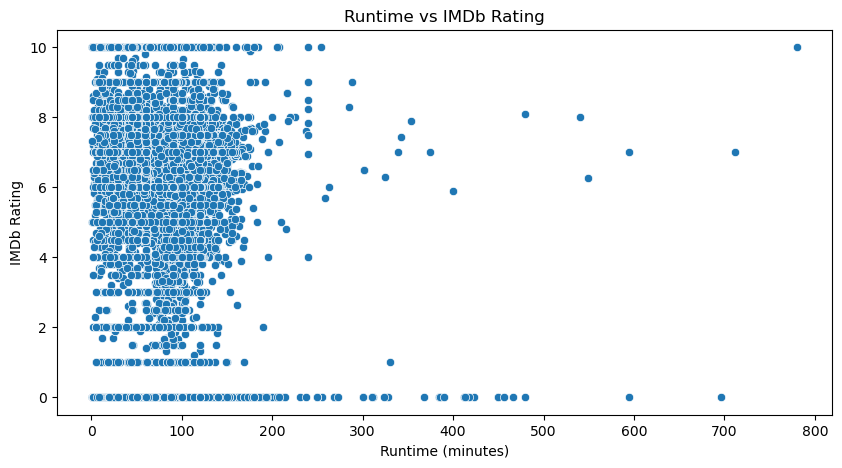

In [59]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime', y='imdb_rating', data=df)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

## 장르별 평점

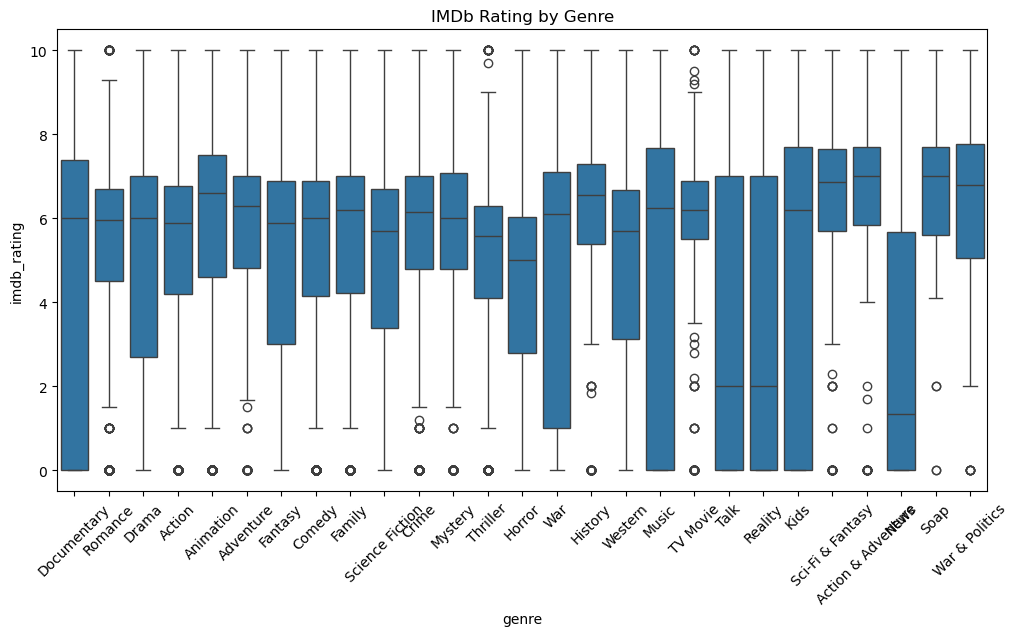

In [60]:
genre_rating = pd.concat([genre_series, df['imdb_rating']], axis=1).explode('genre')
genre_rating = genre_rating.dropna()
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='imdb_rating', data=genre_rating)
plt.title('IMDb Rating by Genre')
plt.xticks(rotation=45)
plt.show()

## 나라별 장르 분포도

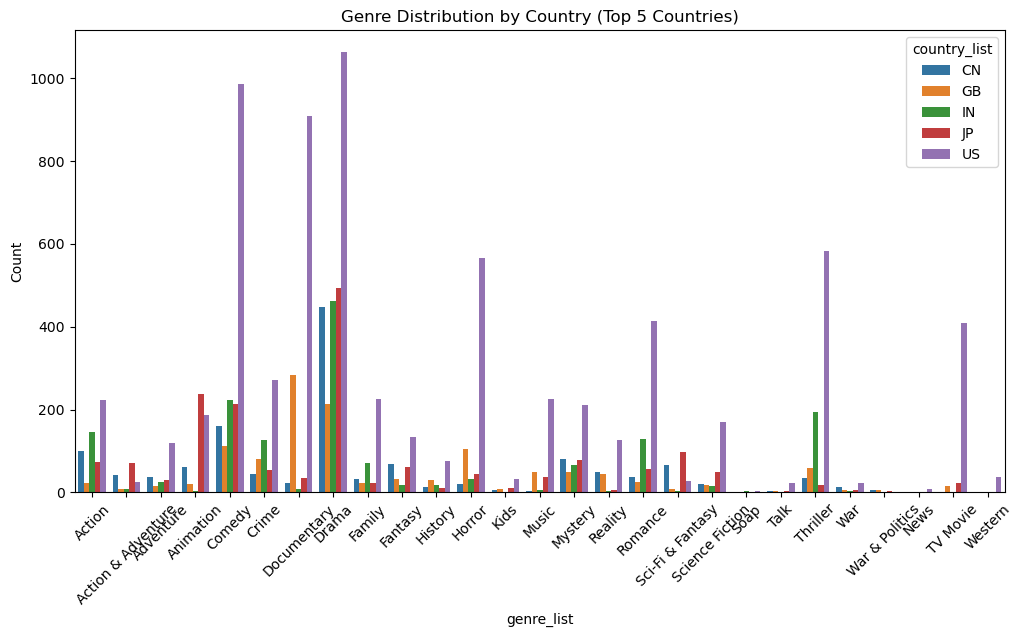

In [61]:
df_country_genre = df.copy()
df_country_genre['country_list'] = df_country_genre['country'].str.split(', ')
df_country_genre = df_country_genre.explode('country_list')
df_country_genre['genre_list'] = df_country_genre['genre'].str.split(', ')
df_country_genre = df_country_genre.explode('genre_list')

country_genre_counts = df_country_genre.groupby(['country_list', 'genre_list']).size().reset_index(name='count')
top_countries = df_country_genre['country_list'].value_counts().head(5).index
filtered = country_genre_counts[country_genre_counts['country_list'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='genre_list', y='count', hue='country_list', data=filtered)
plt.title('Genre Distribution by Country (Top 5 Countries)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## 평점 신뢰도 분석, 감독별 평균 평점

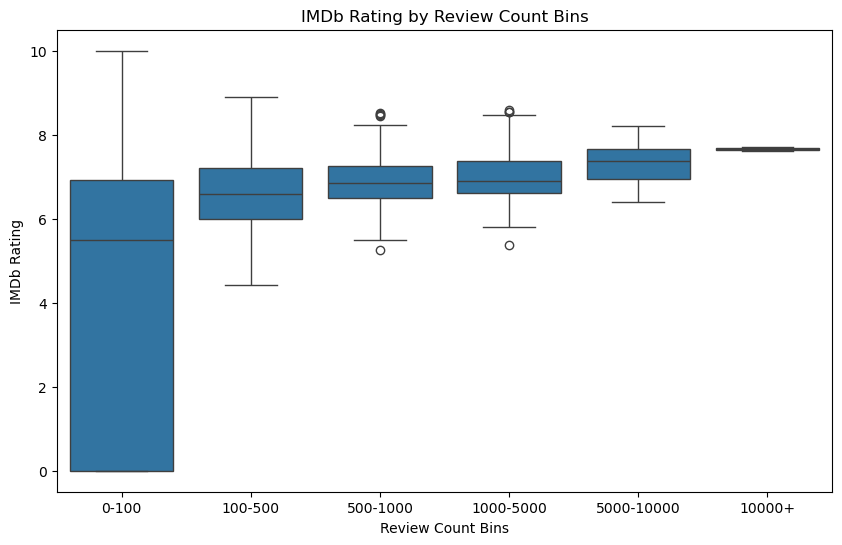

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/2791718114.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='director', data=director_top, palette='viridis')


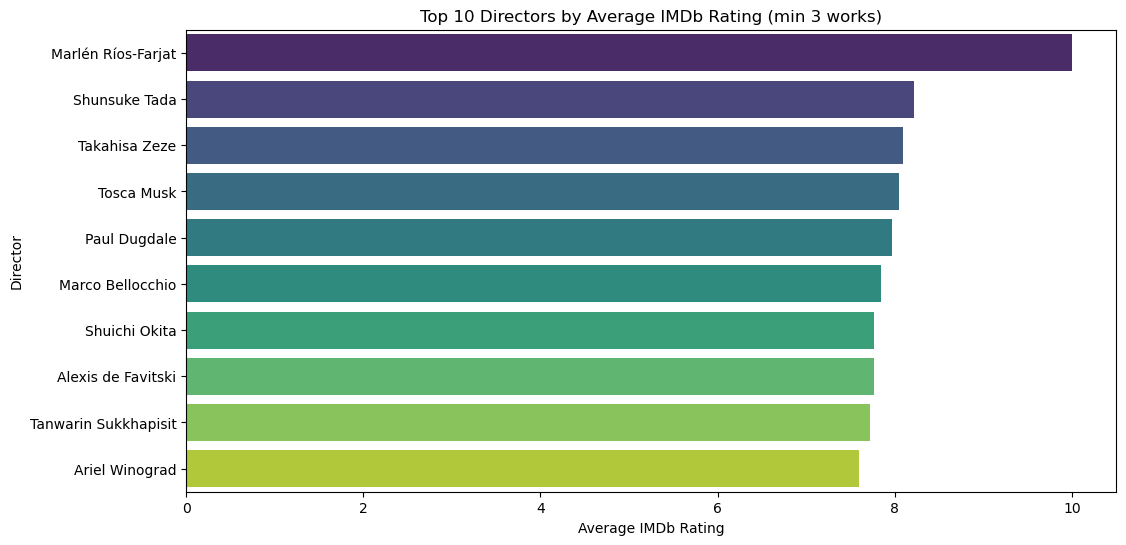

In [62]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['review_bin'] = pd.cut(df['imdb_review_count'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.boxplot(x='review_bin', y='imdb_rating', data=df)
plt.title('IMDb Rating by Review Count Bins')
plt.xlabel('Review Count Bins')
plt.ylabel('IMDb Rating')
plt.show()

### 추가 심화 분석 ③ 감독별 평균 평점
# 감독 집계
director_avg = df.groupby('director')['imdb_rating'].agg(['count', 'mean']).reset_index()
director_top = director_avg[director_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='director', data=director_top, palette='viridis')
plt.title('Top 10 Directors by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()

## 배우별 평균 평점(작품 3개이상인 배우)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9999/3351837532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')


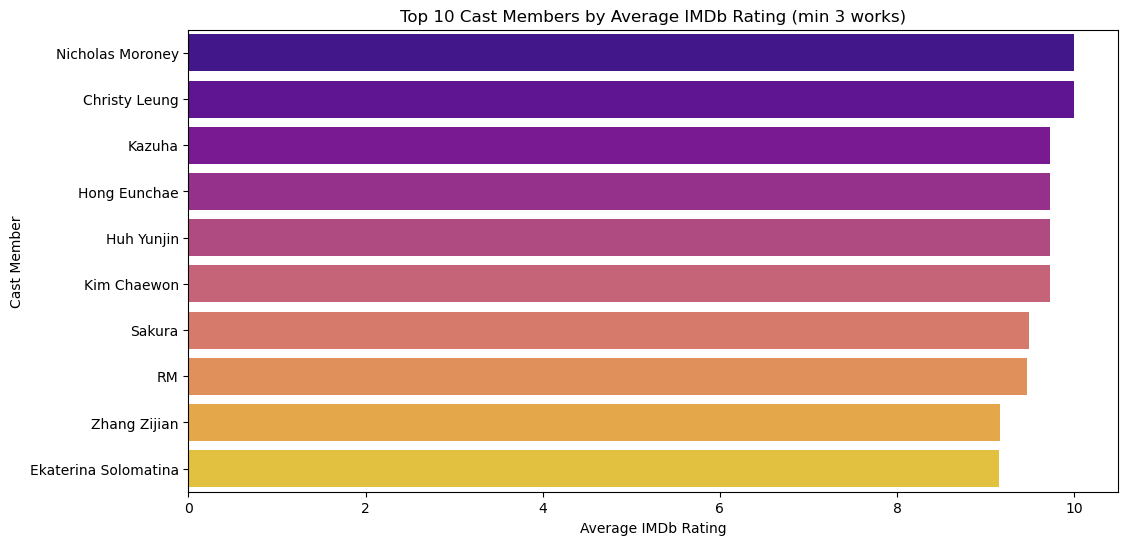

In [63]:
df['cast_list'] = df['cast'].str.split(', ')
df_cast = df.explode('cast_list')

cast_avg = df_cast.groupby('cast_list')['imdb_rating'].agg(['count', 'mean']).reset_index()
cast_top = cast_avg[cast_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')
plt.title('Top 10 Cast Members by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Cast Member')
plt.show()

## 개봉 (월) 분석

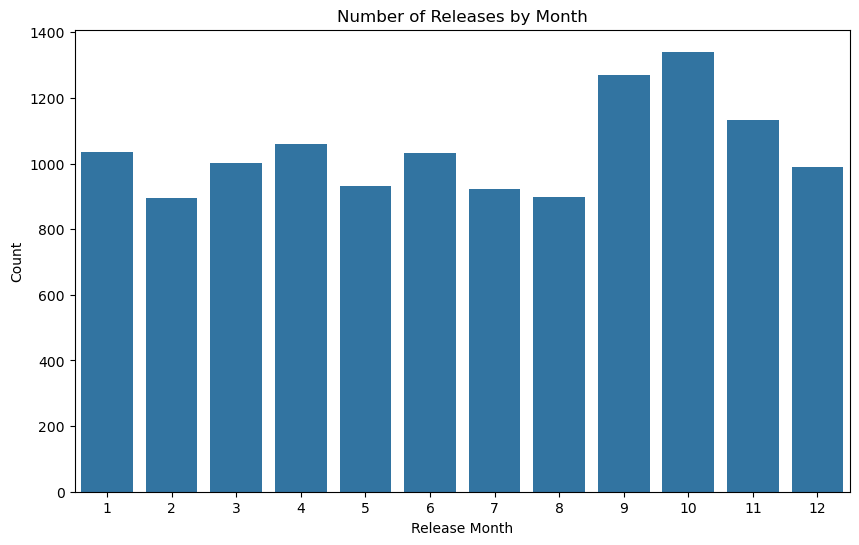

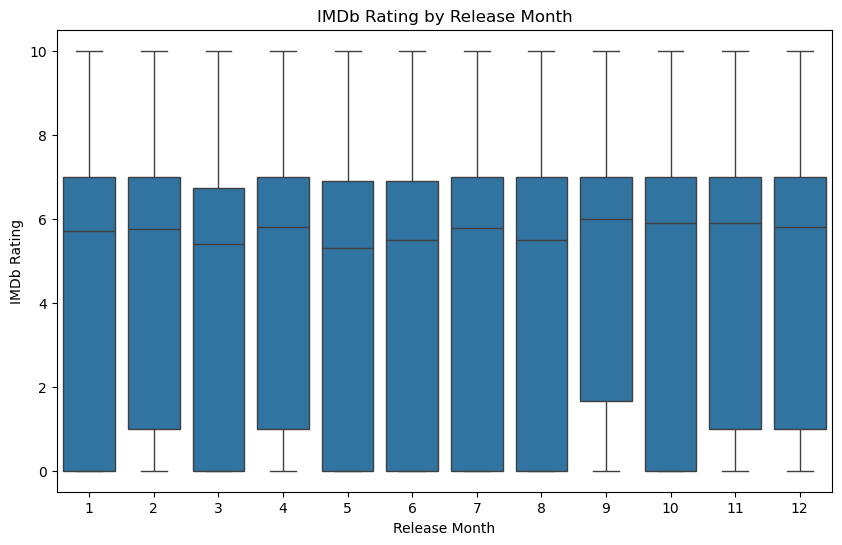

In [64]:
### 추가 심화 분석 ⑤ 개봉 월(month) 분석
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='release_month', data=df)
plt.title('Number of Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='release_month', y='imdb_rating', data=df)
plt.title('IMDb Rating by Release Month')
plt.xlabel('Release Month')
plt.ylabel('IMDb Rating')
plt.show()